In [1]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pykrx import stock
import matplotlib.pyplot as plt
import time
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
"""
분석 기간
"""
start_year = '2012'
end_year = '2021'

In [4]:
"""
한솔제지
"""
code = '213500'

In [6]:
"""
매년 5월 31에 제일 가까운 영업일의 배당금 가져 오기
"""
dps_list = []
for year in range(int(start_year)+1, int(end_year)+2):
    try:
        print(year)
        last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
        print(last_business_day_of_may)
        df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
        display(df_annual_f)
        dps_list.append(df_annual_f.DPS.values[0])
        time.sleep(1)
    except Exception as e:
        print(str(e))
        dps_list.append(0)
        

2013
20130531


""


'DataFrame' object has no attribute 'DPS'
2014
20140530


""


'DataFrame' object has no attribute 'DPS'
2015
20150529


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2015-05-29,0,0.0,0.0,0,0.0,0


2016
20160531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2016-05-31,20212,16.78,1.21,1457,2.04,500


2017
20170531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2017-05-31,21417,8.23,0.91,2370,3.59,700


2018
20180531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-05-31,21976,10.23,0.84,1813,3.23,600


2019
20190531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2019-05-31,23790,8.61,0.58,1602,4.35,600


2020
20200529


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2020-05-29,24810,8.59,0.58,1683,4.15,600


2021
20210531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2021-05-31,26670,6.38,0.6,2493,4.4,700


2022
20220531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2022-05-31,28568,25.22,0.51,575,4.14,600


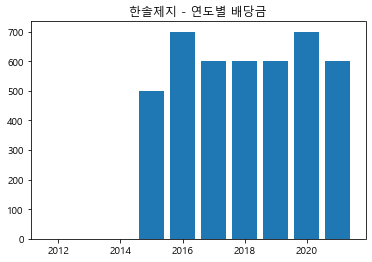

In [7]:
name = stock.get_market_ticker_name(code)

plt.title(f'{name} - 연도별 배당금')
plt.bar(range(int(start_year), int(end_year)+1), dps_list)
plt.show()

배당 성장 연수와 배당 성장률 구하기

In [8]:
def getActualDivGrowth(divs):
    div_history = divs.copy()
    div_history.reverse()
    div_growth_list = []
    for div_cur, div_before in zip(div_history, div_history[1:]):
        print(f'div_cur = {div_cur}, div_before = {div_before}')
        if div_before == 0:
            #print('div_before is 0')
            break;

        if div_cur >= div_before:
            div_growth_list.append(div_cur)
        else:
            #print('div_before is more than div cur')
            div_growth_list.append(div_cur)            
            break

    div_growth_list.reverse()
    return len(div_growth_list) - 1, div_growth_list

In [9]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(dps_list)
actual_div_growth_cnt, actual_div_growth_list

div_cur = 600, div_before = 700


(0, [600])

In [10]:
def getCAGR(div_history):
    cagr = (div_history[-1]/div_history[0]) ** (1/len(div_history)) - 1
    return cagr

In [11]:
cagr = getCAGR(actual_div_growth_list)
cagr

0.0

"""
목표 주가 구하기
"""

In [12]:
start_date = '20150501'
end_date = '20230222'
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='d')

In [13]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2015-05-04,0,0.00,0.00,0,0.00,0
2015-05-06,0,0.00,0.00,0,0.00,0
2015-05-07,0,0.00,0.00,0,0.00,0
2015-05-08,0,0.00,0.00,0,0.00,0
2015-05-11,0,0.00,0.00,0,0.00,0
...,...,...,...,...,...,...
2023-02-16,28568,21.83,0.44,575,4.78,600
2023-02-17,28568,21.84,0.44,575,4.78,600
2023-02-20,28568,22.00,0.44,575,4.74,600


In [14]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(df_f.DPS.to_list())
actual_div_growth_cnt, actual_div_growth_list

div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur = 600, div_before = 600
div_cur 

(201,
 [600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,
  600,


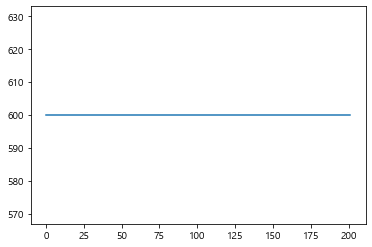

In [15]:
plt.plot(actual_div_growth_list)
plt.show()

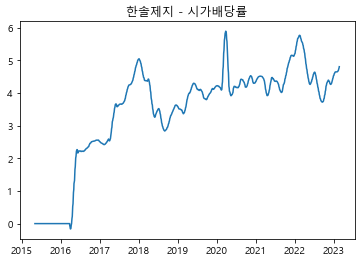

In [16]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

plt.title(f'{name} - 시가배당률')
plt.plot(df_f.index.to_list(), div_yields)
plt.show()

In [17]:
df_p = stock.get_market_ohlcv(start_date, end_date, code)
df_p

,시가,고가,저가,종가,거래량
날짜,,,,,
2015-05-04,23198,23198,22088,22571,148401
2015-05-06,22571,22571,21896,22089,146525
2015-05-07,21896,22426,21510,22427,80906
2015-05-08,22474,22860,21992,22427,155341
2015-05-11,22571,22764,22330,22716,93507
...,...,...,...,...,...
2023-02-16,12490,12620,12410,12550,124230
2023-02-17,12500,12640,12430,12560,46509
2023-02-20,12560,12680,12520,12650,61562


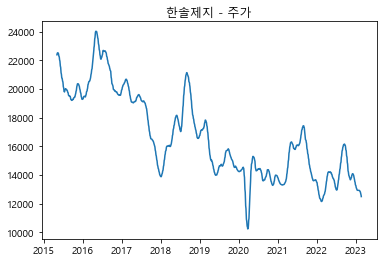

In [18]:
close_prices = savgol_filter(df_p.종가, 51, 3)

plt.title(f'{name} - 주가')
plt.plot(df_f.index.to_list(), close_prices)
plt.show()

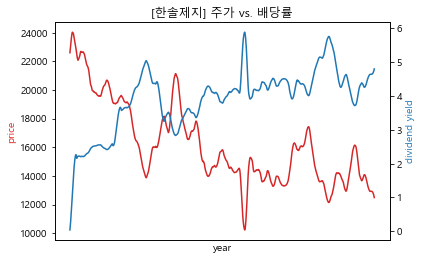

In [53]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(close_prices[div_yields > 0], color=color)
ax1.set_xticks([])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(div_yields[div_yields > 0], color=color)
plt.title(f'[{name}] 주가 vs. 배당률')
plt.show()

In [20]:
np.corrcoef(div_yields, close_prices)

array([[ 1.        , -0.82027897],
       [-0.82027897,  1.        ]])

"""
매수점수 계산
"""

In [21]:
df_cur_f = stock.get_market_fundamental('20230222', '20230222', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-22,28568,21.86,0.44,575,4.77,600


In [22]:
cur_div = df_cur_f.DIV[0]
cur_div

4.77

In [58]:
print(f'{cur_div, 2)} ')

4.769999980926514 


In [23]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buy_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    return buy_score

In [51]:
div_min = round(min(div_yields_without_zero_filtered), 2)
div_min

2.01

In [52]:
div_max = round(max(div_yields_without_zero_filtered), 2)
div_max

5.89

In [49]:
calculate_buy_score(cur_div, div_min, div_max)

71

In [36]:
div_min = min(df_f.DIV[df_f.DIV > 0])
div_min

1.9299999475479126

In [38]:
div_max = max(df_f.DIV)
div_max

7.130000114440918

In [30]:
df_cur_f.DPS[0]

600

In [32]:
target_price = df_cur_f.DPS[0]/min(df_f.DIV[df_f.DIV > 0]) * 100
target_price

31088.083746442946

In [33]:
"""역산"""
df_cur_f.DPS[0]/target_price

0.019299999475479127

In [34]:
buy_price = df_cur_f.DPS[0]/max(df_f.DIV) * 100
buy_price

8415.147130008812

In [39]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

55

"""
로우 패스 필터
"""

In [ ]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

In [ ]:
min(div_yields)

In [ ]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(df_p['종가'], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(df_f['DIV'], color=color)
plt.show()

In [ ]:
df_cur_f = stock.get_market_fundamental('20230214', '20230214', code)
df_cur_f

In [ ]:
df_cur_p = stock.get_market_ohlcv('20230214', '20230214', code)
df_cur_p

In [ ]:
cur_price = df_cur_p.종가[0]
cur_price

In [ ]:
div_min = min(div_yields)
div_min

In [ ]:
div_max = max(div_yields)
div_max

In [ ]:
cur_dps = df_cur_f.DPS[0]
cur_dps

In [ ]:
target_price = cur_dps/div_min * 100
target_price

In [ ]:
buy_price = cur_div/div_max * 100
buy_price

In [ ]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

In [ ]:
day = stock.get_nearest_business_day_in_a_week('20220610')
day

In [ ]:
"""
분석 기간
"""
start_year = '2012'
end_year = '2021'

"""
NH 투자증권
"""
code = '005940'


In [ ]:
"""
매년 5월 31에 제일 가까운 영업일의 배당금 가져 오기
"""
dps_list = []
for year in range(int(start_year)+1, int(end_year)+2):
    #print(year)
    last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
    print(last_business_day_of_may)
    df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
    display(df_annual_f)
    dps_list.append(df_annual_f.DPS.values[0])
    time.sleep(1)

In [ ]:
dps_list

In [ ]:
def getAnnualDPS(start_year, end_year):
    dps_list = []
    for year in range(int(start_year)+1, int(end_year)+2):
        #print(year)
        last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
        #print(last_business_day_of_may)
        df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
        #display(df_annual_f)
        dps_list.append(df_annual_f.DPS.values[0])
        time.sleep(1)
    return dps_list

In [ ]:
annual_dps_list = getAnnualDPS(start_year, end_year)
annual_dps_list

In [ ]:
years = range(int(start_year), int(end_year)+1)
years

In [ ]:
plt.bar(years, annual_dps_list)
plt.show()

In [ ]:
def getActualDivGrowth(divs):
    div_history = divs.copy()
    div_history.reverse()
    div_growth_list = []
    for div_cur, div_before in zip(div_history, div_history[1:]):
        print(f'div_cur = {div_cur}, div_before = {div_before}')
        if div_before == 0:
            #print('div_before is 0')
            break;

        if div_cur >= div_before:
            div_growth_list.append(div_cur)
        else:
            #print('div_before is more than div cur')
            div_growth_list.append(div_cur)            
            break

    div_growth_list.reverse()
    return len(div_growth_list) - 1, div_growth_list

In [ ]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(dps_list)
actual_div_growth_cnt, actual_div_growth_list

In [ ]:
getCAGR(actual_div_growth_list)